In [1]:
from scipy.io import loadmat

def load_matrix(file, label_x, label_y):
    data = loadmat(file)
    return data[label_x], data[label_y]

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [45]:
def diffmap(xs, sigma, t, m):
    print("Input data shape:", xs.shape)  # Debug: Print input shape
    # Compute pairwise squared distances between all the columns in xs.
    sq_distances = squareform(pdist(xs, 'sqeuclidean'))
    print("Squared distances shape:", sq_distances.shape)  # Debug

    # Construct the similarities matrix W
    W = np.exp(-sq_distances / (2 * sigma**2))
    print("Similarity matrix W shape:", W.shape)  # Debug

    # Construct a walk matrix M by normalizing the rows of W
    D_inv = np.diag(1.0 / np.sum(W, axis=1))
    M = D_inv @ W
    print("Walk matrix M shape:", M.shape)  # Debug

    # Compute the first m + 1 right eigenvectors of M
    eigenvalues, eigenvectors = eigsh(M, k=m+1, which='LM')

    print("Eigenvalues shape:", eigenvalues.shape)  # Debug
    print("Eigenvectors shape:", eigenvectors.shape)  # Debug

    # Sort the eigenvalues in descending order and rearrange eigenvectors
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]

    # Construct the diffusion map
    diffusion_map = eigenvectors[:, 1:m+1] @ np.diag(eigenvalues[1:m+1]**t)
    diffusion_values = eigenvalues[1:m+1]

    return diffusion_map, diffusion_values

In [46]:
# TODO: Test code on spiral.mat
# Spiral.mat contains a data matrix in the variable 'spirals', and the position of each point along the spiral in 'thetas'.
spiral_data, spiral_theta = load_matrix('spiral.mat', 'spiral', 'thetas')
print("Spiral Data:", spiral_data.shape)
print("Spiral Thetas:", spiral_theta.shape)
spiral_data

Spiral Data: (1000, 2)
Spiral Thetas: (1000, 1)


array([[11.24791989, -4.65688342],
       [-2.46754295, -3.22276787],
       [-2.8814118 , -2.58879169],
       ...,
       [ 0.30293658,  1.30872413],
       [ 3.23119751, -4.27594343],
       [-6.9488064 , -7.53596289]])

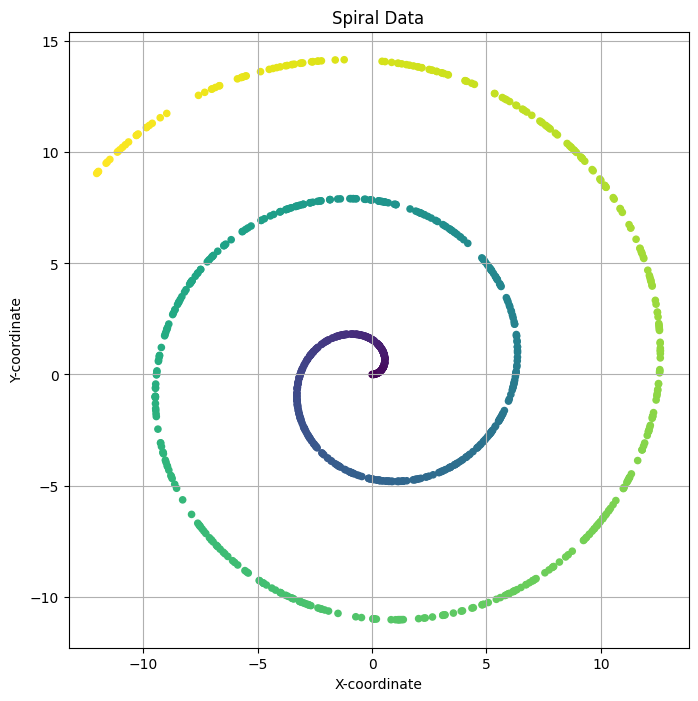

In [47]:
# Visualize spiral_data
plt.figure(figsize=(8, 8))
plt.scatter(spiral_data[:, 0], spiral_data[:, 1], c=spiral_theta[:, 0], s=20)
plt.title('Spiral Data')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()

In [48]:
# Hyperparameters
sigma = 1.5
t = 1
m = 2

diffusion_map, diffusion_eigenvalues = diffmap(spiral_data, sigma, t, m)
print("Shape of the Diffusion Map:", diffusion_map.shape)
print("Diffusion Eigenvalues:", diffusion_eigenvalues)

Input data shape: (1000, 2)
Squared distances shape: (1000, 1000)
Similarity matrix W shape: (1000, 1000)
Walk matrix M shape: (1000, 1000)
Eigenvalues shape: (3,)
Eigenvectors shape: (1000, 3)
Shape of the Diffusion Map: (1000, 2)
Diffusion Eigenvalues: [0.99755807 0.99682683]


In [49]:
print("Diffusion Map:", diffusion_map)
print("Diffusion Eigenvalues:", diffusion_eigenvalues)

Diffusion Map: [[-0.02101222 -0.01619107]
 [-0.0343629   0.02482854]
 [-0.03443345  0.02568253]
 ...
 [-0.03524945  0.02809045]
 [-0.03490064  0.02018422]
 [-0.03512656 -0.04274342]]
Diffusion Eigenvalues: [0.99755807 0.99682683]


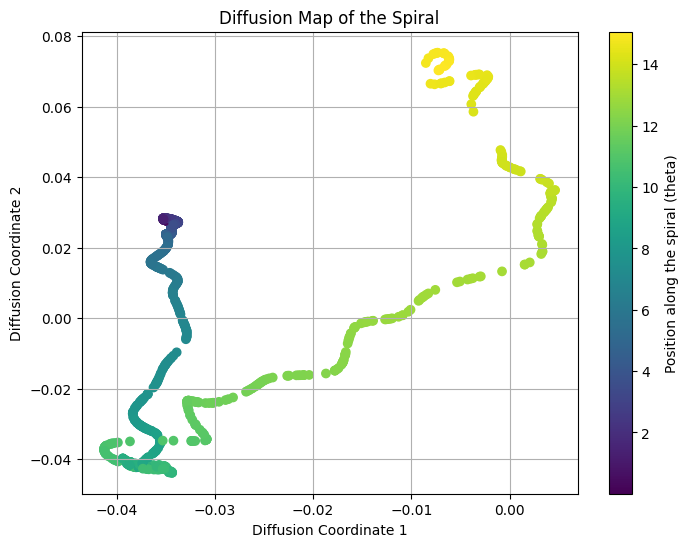

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(diffusion_map[:, 0], diffusion_map[:, 1], c=spiral_theta[:, 0], cmap='viridis')
plt.colorbar(label='Position along the spiral (theta)')
plt.xlabel('Diffusion Coordinate 1')
plt.ylabel('Diffusion Coordinate 2')
plt.title('Diffusion Map of the Spiral')
plt.grid(True)
plt.show()

In [51]:
digit_data, digit_labels = load_matrix('digits.mat', 'X', 'y')
print("Digit Data:", digit_data.shape)
print("Digit Labels:", digit_labels.shape)

Digit Data: (901, 64)
Digit Labels: (901, 1)


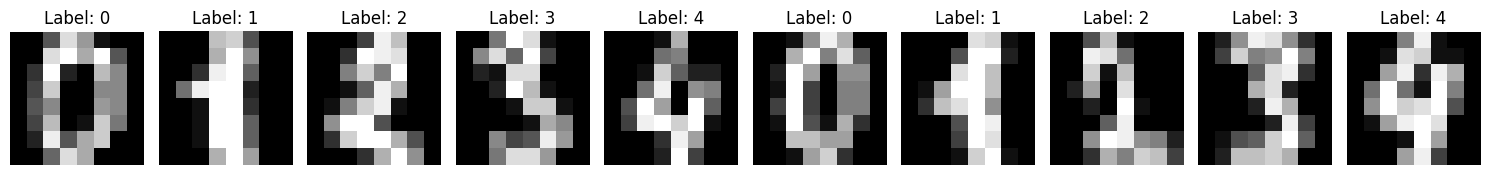

In [52]:
num_to_visualize = 10
fig, axes = plt.subplots(1, num_to_visualize, figsize=(15, 3))

for i in range(num_to_visualize):
    image = digit_data[i, :].reshape(8, 8)  # Reshape to 8x8
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {digit_labels[i, 0]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [53]:
def plot_digit_diffmap(map, values, labels, sigma):
    plt.figure(figsize=(8, 6))
    plt.scatter(map[:, 0], map[:, 1], c=labels[:, 0], cmap='viridis')
    plt.colorbar(label='Digit Label')
    plt.xlabel('Diffusion Coordinate 1')
    plt.ylabel('Diffusion Coordinate 2')
    plt.title(f'Diffusion Map of Digits with Sigma: {sigma}')
    plt.grid(True)
    plt.show()

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)


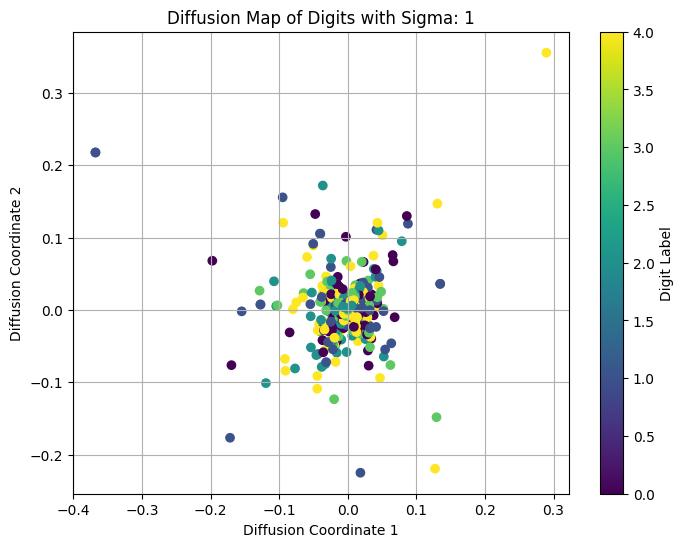

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)


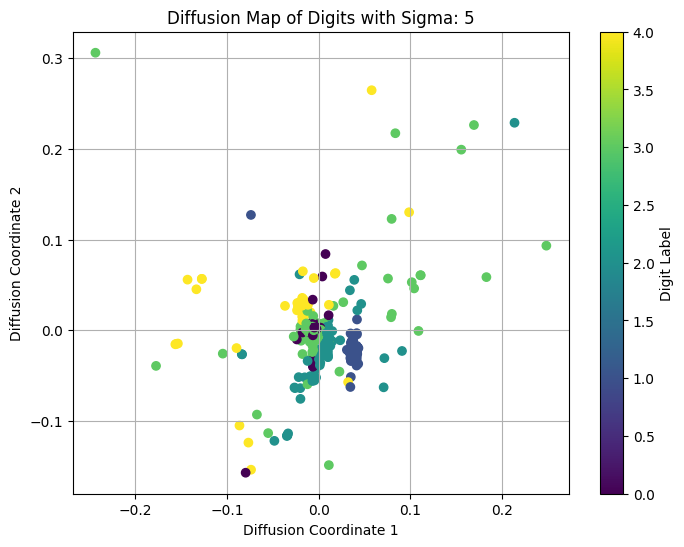

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)


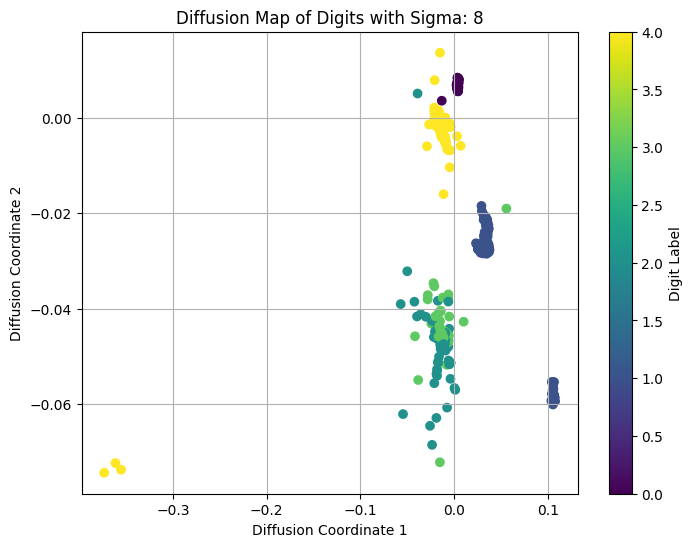

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)


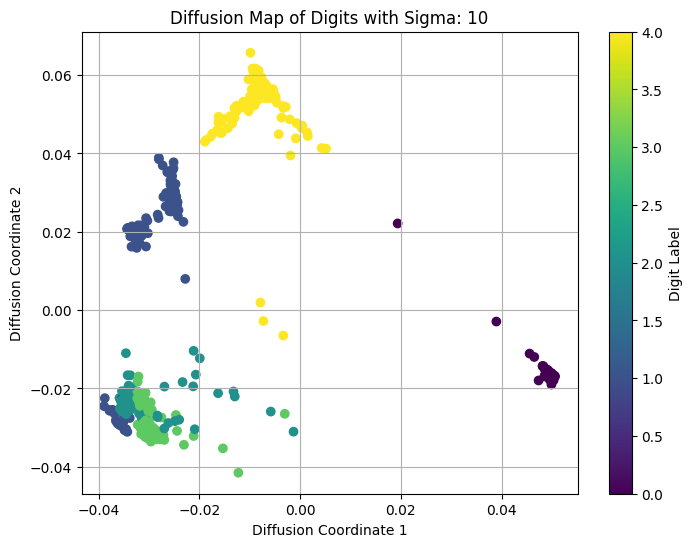

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)


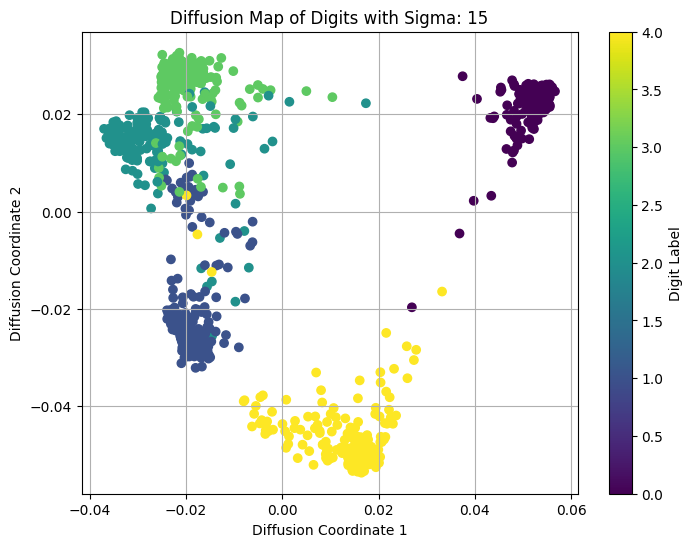

In [55]:
# Hyperparameters
t = 1
m = 4

for sigma in [1, 5, 8, 10, 15]:
    digits_map, digits_values = diffmap(digit_data, sigma, t, m)
    plot_digit_diffmap(digits_map, digits_values, digit_labels, sigma)

4/5. It seems the digits 2 and 3 consistently look the most similar across different diffusion maps of the first two features, but this is really amazing, it looks so much easier to separate the groups than we could otherwise!


Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)
Sigma: 1
Diffusion Map Shape: (901, 4)
Diffusion Values Shape: (4,)


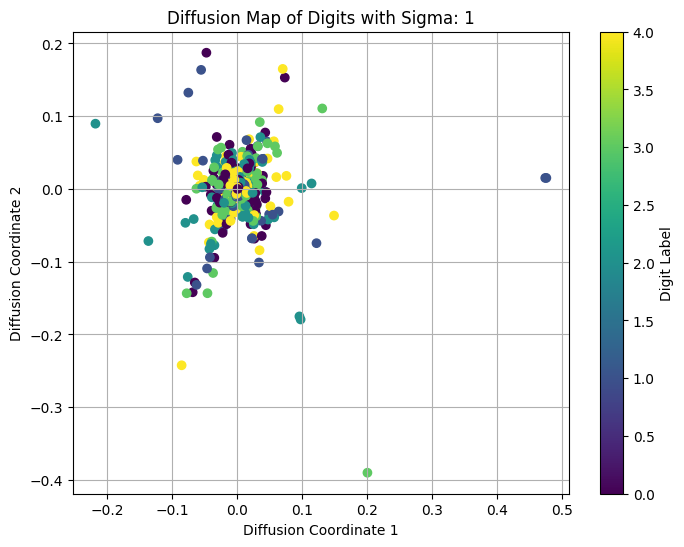

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)
Sigma: 5
Diffusion Map Shape: (901, 4)
Diffusion Values Shape: (4,)


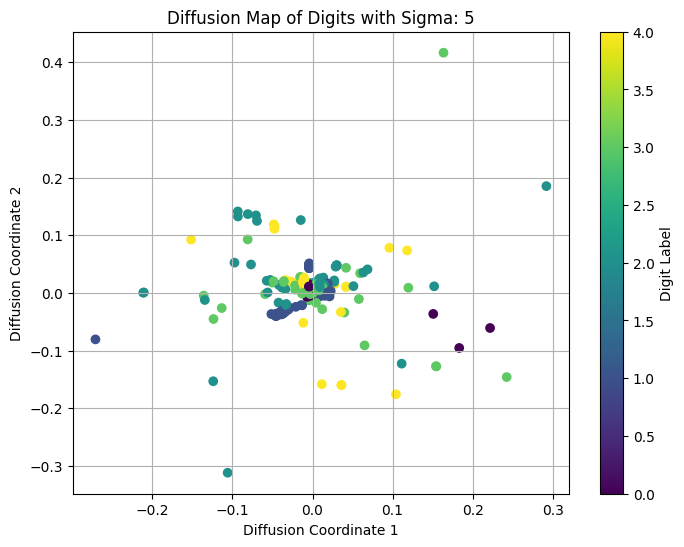

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)
Sigma: 8
Diffusion Map Shape: (901, 4)
Diffusion Values Shape: (4,)


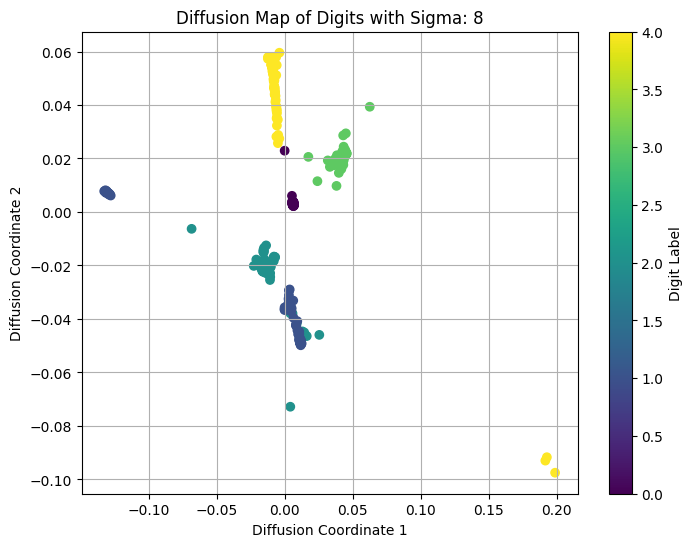

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)
Sigma: 10
Diffusion Map Shape: (901, 4)
Diffusion Values Shape: (4,)


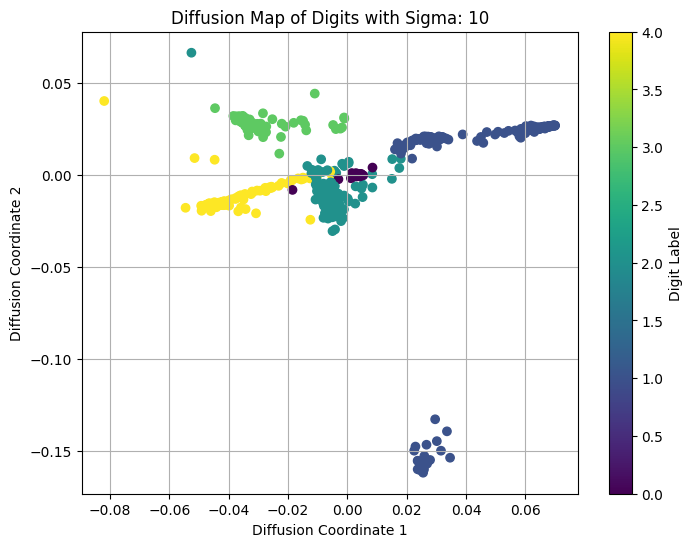

Input data shape: (901, 64)
Squared distances shape: (901, 901)
Similarity matrix W shape: (901, 901)
Walk matrix M shape: (901, 901)
Eigenvalues shape: (5,)
Eigenvectors shape: (901, 5)
Sigma: 15
Diffusion Map Shape: (901, 4)
Diffusion Values Shape: (4,)


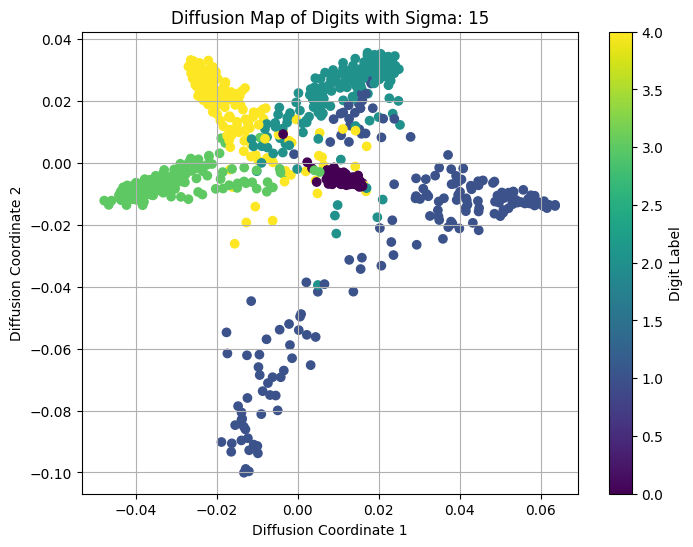

In [61]:
# Hyperparameters
t = 1
m = 4

for sigma in [1, 5, 8, 10, 15]:
    digits_map, digits_values = diffmap(digit_data, sigma, t, m)
    print(f"Sigma: {sigma}")
    print(f"Diffusion Map Shape: {digits_map.shape}")
    print(f"Diffusion Values Shape: {digits_values.shape}")

    # Chopped off the first feature column
    plot_digit_diffmap(digits_map[:, 2:], digits_values[2:], digit_labels, sigma)

With diffusion features 3 and 4 compared against each other, 2 and 3, have more differences. Between these two coordinate systems, however, I still would prefer to perform linear separations on the first, because the spread of the groups feels more distinct.